In [1]:
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
pjoin = os.path.join
path="/data/mio_tcd_seg/out/"

for k in os.listdir(path):
    pt = pjoin(path,k)
    img_pt = pjoin('/data/mio_tcd_seg/images',k[:-4]+'jpg')
    #print(img_pt)
    img = cv2.cvtColor(cv2.imread(img_pt),cv2.COLOR_BGR2RGB)
    boxes = json.load(open(pt))
    if len(boxes) == 0:
        continue
    for box in boxes:
        lbl = box['label']
        conf = box['confidence']
        bt_r = box['bottomright']
        t_l = box['topleft']
        angle = box['angle']
        x1,y1,x2,y2 = (t_l['x'],t_l['y'],bt_r['x'],bt_r['y'])
        cx = (t_l['x'] + bt_r['x']) //2
        cy = (t_l['y'] + bt_r['y']) //2
        w = x2 - x1
        h = y2-y1
    
        
        cv2.line(img,(cx,cy),(int(cx+np.cos(angle)*20),int(cy+np.sin(angle)*20)),(255,0,0),1)
        cv2.rectangle(img,(t_l['x'],t_l['y']),(bt_r['x'],bt_r['y']),(0,255,0),1)
        
        
    cv2.imshow('machin',img)
    cv2.waitKey(2000)

KeyboardInterrupt: 

/data/mio_tcd_seg/images/00042075.jpg


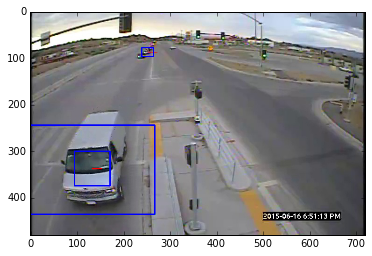

In [2]:
k = os.listdir(path)[0]
pt = pjoin(path,k)
img_pt = pjoin('/data/mio_tcd_seg/images',k[:-4]+'jpg')
print(img_pt)
img = cv2.cvtColor(cv2.imread(img_pt),cv2.COLOR_BGR2RGB)
boxes = json.load(open(pt))
if len(boxes) == 0:
    raise Exception
for box in boxes:
    lbl = box['label']
    conf = box['confidence']
    bt_r = box['bottomright']
    t_l = box['topleft']
    angle = box['angle']
    x1,y1,x2,y2 = (t_l['x'],t_l['y'],bt_r['x'],bt_r['y'])
    cx = (t_l['x'] + bt_r['x']) //2
    cy = (t_l['y'] + bt_r['y']) //2
    w = x2 - x1
    h = y2-y1
    
    """#x1,y1 = x1-cx, y1-cy
    #x2,y2 = x2-cx, y2-cy
    print("CX,CY",cx,cy)
    
    M_inv = cv2.getRotationMatrix2D((cx,cy),np.degrees(angle),1)
    points = np.array([[x1,y1],[x2,y2]])
    ones = np.ones(shape=(len(points), 1))
    points_ones = np.hstack([points, ones])
    transformed_points = M_inv.dot(points_ones.T).T
    print(transformed_points.shape)
    
    [x1,y1],[x2,y2] = transformed_points
    print(transformed_points)"""
    
    cv2.line(img,(cx,cy),(int(cx+np.cos(np.radians(angle))*20),int(cy+np.sin(np.radians(angle))*20)),(255,0,0),1)
    cv2.rectangle(img,(t_l['x'],t_l['y']),(bt_r['x'],bt_r['y']),(0,255,0),1)
    
    rect = ((cx,cy),(w,h),(angle))
    box1 = cv2.boxPoints(rect) 
    box1 = np.int0(box1)
    cv2.drawContours(img,[box1],0,(0,0,255),2)
    
    
plt.imshow(img)